In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\91895\\Downloads\\Text_Analysis.csv")
df.head()


,Article,Title
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms
2,You must have seen the news divided into categ...,News Classification with Machine Learning
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning


In [4]:
df.isnull().sum()

Article    0
Title      0
dtype: int64

In [5]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [8]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["Title"].apply(clean)

In [9]:
df.head()

,Article,Title,text
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis,best book learn data analysi
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms,assumpt machin learn algorithm
2,You must have seen the news divided into categ...,News Classification with Machine Learning,news classif machin learn
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...,multiclass classif algorithm machin learn
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning,multinomi naiv bay machin learn


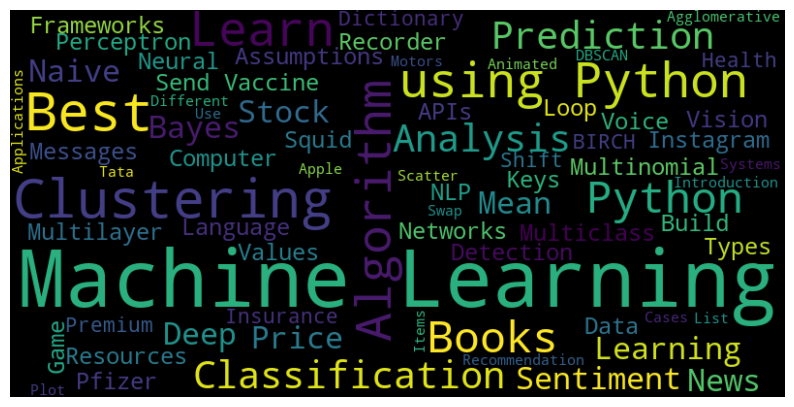

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


all_titles = ' '.join(df['Title'])


wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_titles)


plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [11]:
from textblob import TextBlob


def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity


df['Sentiment'] = df['text'].apply(get_sentiment)

df[['Title', 'Sentiment']]


,Title,Sentiment
0,Best Books to Learn Data Analysis,1.0000
1,Assumptions of Machine Learning Algorithms,0.0000
2,News Classification with Machine Learning,0.0000
3,Multiclass Classification Algorithms in Machin...,0.0000
4,Multinomial Naive Bayes in Machine Learning,0.0000
5,News Classification with Machine Learning,0.0000
6,Best Books to Learn NLP,1.0000
7,Send Instagram Messages using Python,0.0000
8,Pfizer Vaccine Sentiment Analysis using Python,0.0000
9,Squid Game Sentiment Analysis using Python,-0.4000


In [23]:
# !pip install wordcloud matplotlib textblob spacy scikit-learn




In [22]:
import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
from nltk.chunk import conlltags2tree, tree2conlltags


nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')


def extract_entities_nltk(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    tree = ne_chunk(pos_tags)
    entities = tree2conlltags(tree)
    entities = [(entity[0], entity[2]) for entity in entities if entity[2] != 'O']
    return entities


df['Entities'] = df['Article'].apply(extract_entities_nltk)


df[['Title', 'Entities']]


[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading maxent_ne_chunker: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>
[nltk_data] Error loading words: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


,Title,Entities
0,Best Books to Learn Data Analysis,"[(Data, B-GPE)]"
1,Assumptions of Machine Learning Algorithms,[]
2,News Classification with Machine Learning,"[(Python, B-PERSON)]"
3,Multiclass Classification Algorithms in Machin...,[]
4,Multinomial Naive Bayes in Machine Learning,"[(Multinomial, B-ORGANIZATION), (Naive, I-ORGA..."
5,News Classification with Machine Learning,"[(Python, B-PERSON)]"
6,Best Books to Learn NLP,"[(NLP, B-ORGANIZATION), (NLP, B-ORGANIZATION),..."
7,Send Instagram Messages using Python,"[(API, B-ORGANIZATION), (Instagram, B-PERSON),..."
8,Pfizer Vaccine Sentiment Analysis using Python,"[(Twitter, B-PERSON), (Pfizer, B-PERSON), (Pfi..."
9,Squid Game Sentiment Analysis using Python,"[(NetFlix, B-ORGANIZATION), (Squid, B-PERSON),..."


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


def get_topics(text):
    vectorizer = CountVectorizer(max_df=0.85, stop_words='english', max_features=1000)
    dtm = vectorizer.fit_transform(text)
    
    lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_model.fit(dtm)
    
    return vectorizer, lda_model  


vectorizer, lda_model = get_topics(df['text'])


for index, topic in enumerate(lda_model.components_):
    print(f"Topic #{index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


Topic #1:
['book', 'machin', 'learn', 'introduct', 'recommend', 'send', 'messag', 'instagram', 'python', 'use']


Topic #2:
['game', 'pfizer', 'vaccin', 'book', 'sentiment', 'best', 'use', 'learn', 'analysi', 'python']


Topic #3:
['type', 'neural', 'multilay', 'perceptron', 'multinomi', 'algorithm', 'naiv', 'bay', 'learn', 'machin']


Topic #4:
['book', 'deep', 'news', 'best', 'algorithm', 'classif', 'python', 'cluster', 'machin', 'learn']


Topic #5:
['nlp', 'appl', 'tata', 'motor', 'book', 'price', 'stock', 'predict', 'machin', 'learn']


